### EDA

Demand forecasting dataset taken from https://www.kaggle.com/competitions/demand-forecasting-kernels-only/data


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
train_dataset = pd.read_csv("../data/train.csv")
train_dataset['date'] = pd.to_datetime(train_dataset['date'])
print(f"shape: {train_dataset.shape}")
display(train_dataset.head(5))
display(train_dataset.nunique(),train_dataset.dtypes)

shape: (913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


date     1826
store      10
item       50
sales     213
dtype: int64

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [14]:
print(train_dataset.head(5))

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10


#### Objectives
- Visualize sales of a few objects across all 10 stores
- Visualize the sales of multiple objects for stores

#### Identify
- Which products are similar?
    - PCA
    - Clustering
- 

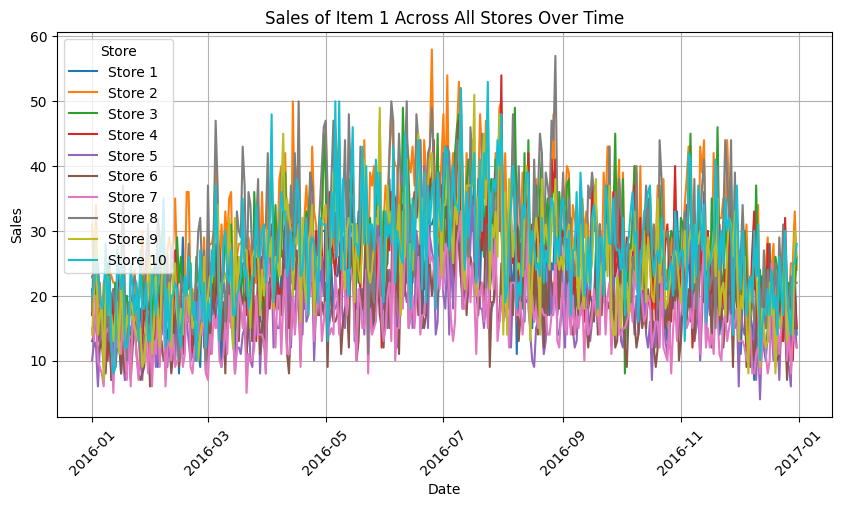

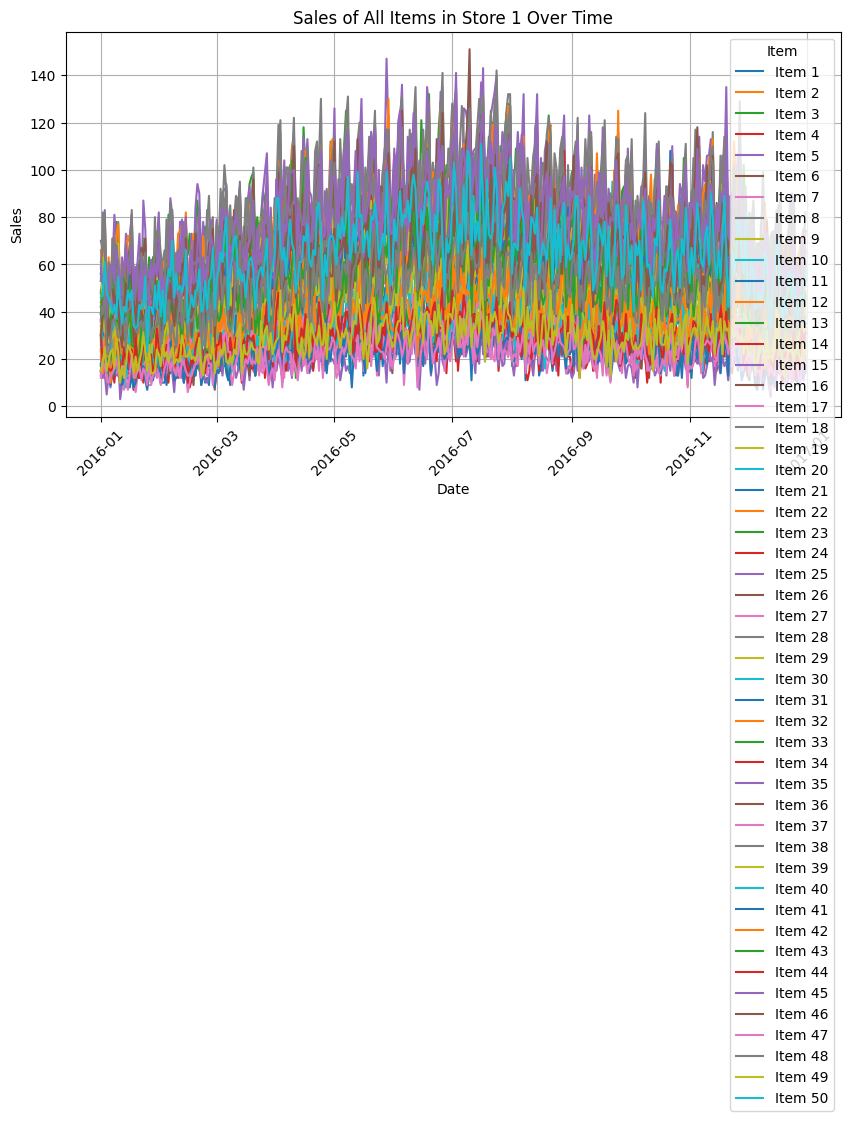

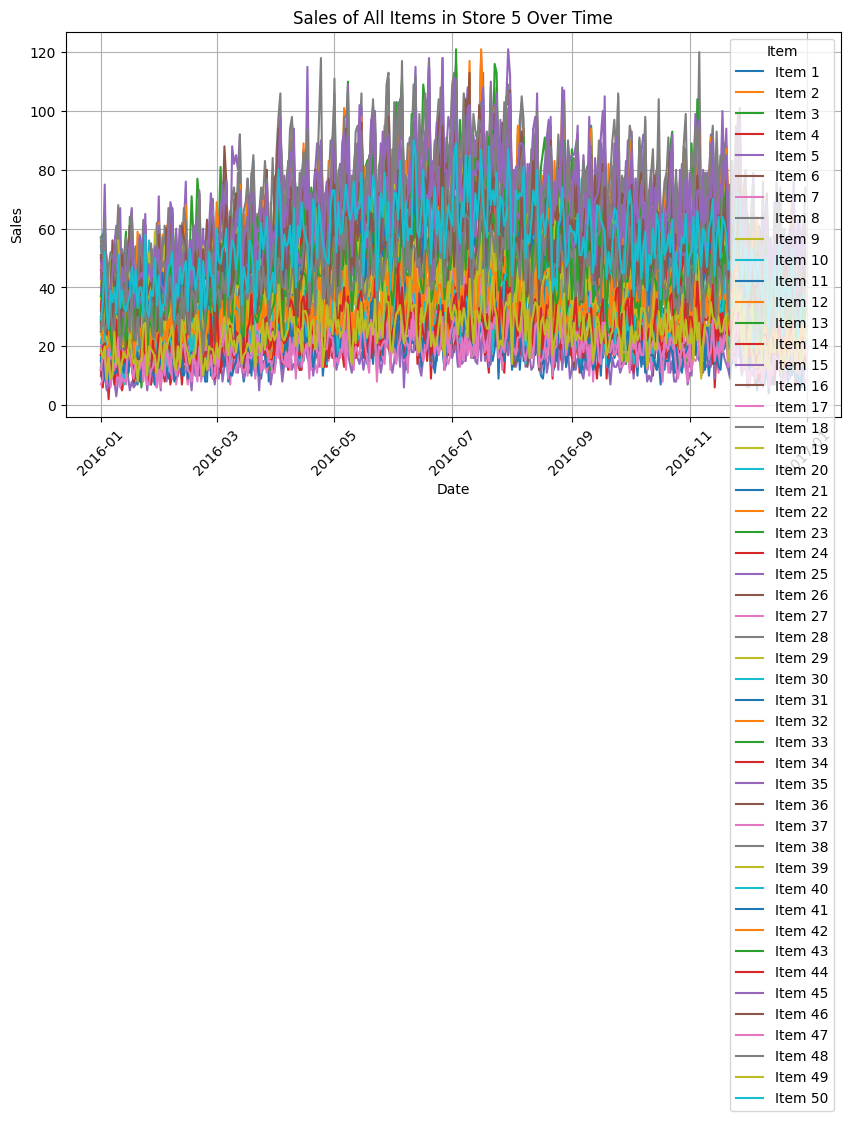

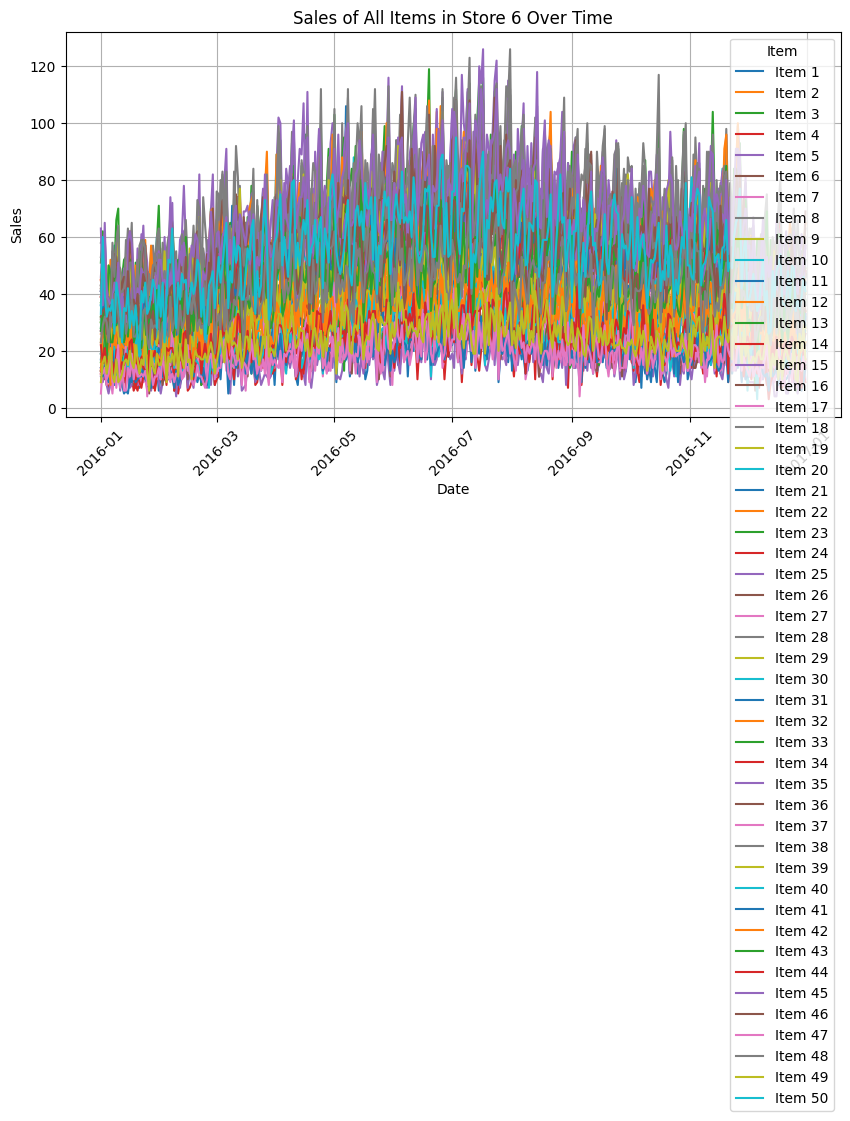

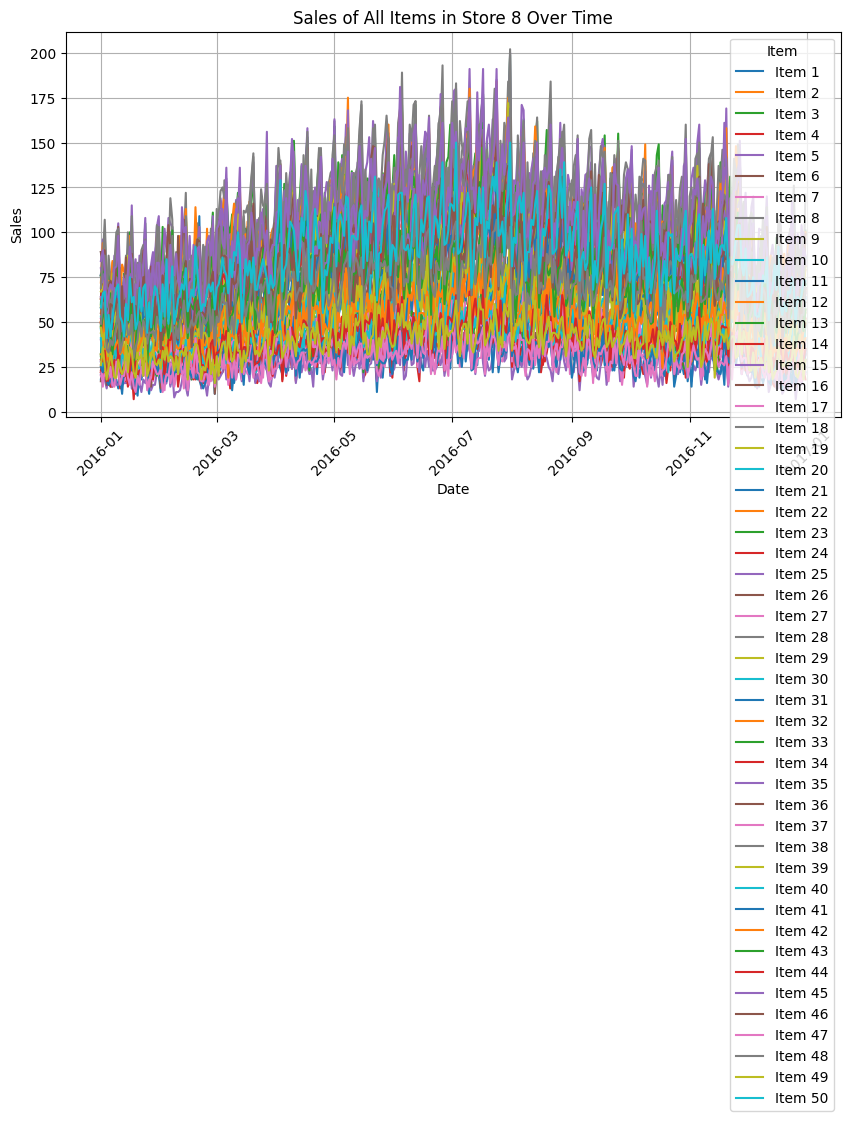

In [45]:
# Plot 1: Sales of a single item across all stores over time
item_ids = [1, 2, 4, 5, 8, 10, 13]
for item_id in [1]:
    df_item = train_dataset[train_dataset["item"] == item_id]\
        .groupby(["date", "store"])["sales"]\
        .sum()\
        .unstack()\
        .reset_index()

    df_item = df_item[df_item['date'].dt.year == 2016]

    plt.figure(figsize=(10, 5))
    for store in df_item.columns[1:]:  # Exclude 'date' column
        plt.plot(df_item["date"], df_item[store], label=f"Store {store}")

    plt.title(f"Sales of Item {item_id} Across All Stores Over Time")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend(title="Store")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Plot 2: Sales of all items for a single store over time
for store_id in [1, 5, 6, 8]:
    df_store = train_dataset[train_dataset["store"] == store_id]\
        .groupby(["date", "item"])["sales"]\
        .sum()\
        .unstack()\
        .reset_index()
    df_store = df_store[df_store['date'].dt.year == 2016]

    plt.figure(figsize=(10, 5))

    for item in range(1,51):  # Exclude 'date' column
        plt.plot(df_store["date"], df_store[item], label=f"Item {item}")

    plt.title(f"Sales of All Items in Store {store_id} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend(title="Item")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


In [37]:
df_store = train_dataset[train_dataset["store"] == 1]\
    .groupby(["date", "item"])["sales"]\
    .sum()\
    .unstack()\
    .reset_index()
df_store = df_store[df_store['date'].dt.year == 2016]

In [38]:
df_store


item,date,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
1095,2016-01-01,21,32,23,15,14,34,30,56,47,...,17,24,30,30,59,28,12,42,15,46
1096,2016-01-02,13,43,22,15,12,36,44,68,37,...,21,14,38,18,52,41,19,39,19,47
1097,2016-01-03,12,47,31,21,14,60,32,58,31,...,17,29,40,18,59,48,17,50,25,61
1098,2016-01-04,12,22,23,12,5,23,19,41,16,...,21,21,34,17,35,26,11,22,15,48
1099,2016-01-05,12,34,18,12,13,40,27,43,35,...,15,23,30,16,54,37,10,22,19,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2016-12-27,10,41,29,15,12,34,48,42,24,...,9,26,32,22,59,36,16,37,23,37
1457,2016-12-28,16,38,22,17,19,31,52,53,31,...,19,18,36,15,54,42,8,33,21,44
1458,2016-12-29,21,56,26,21,12,46,34,52,35,...,12,26,37,32,52,39,15,47,18,47
1459,2016-12-30,24,37,26,20,11,54,30,67,39,...,16,27,50,27,74,48,23,34,26,46


#### Idea 1 - Baseline model
- Reduce granularity to per week
- Predict sales based on average sales across all stores
- A few models
    - XGBoost
    - Baseline regression model